# 正则化回归
在回归任务中，大致分为线性回归、多项式回归、正则化回归、随机森林回归等传统机器学习方法，因为线性回归与多项式回归较为常见与熟悉，调用方法也简单，本次我们只讨论相对生疏一点的正则化回归的具体细节，随机森林回归另设代码文件进行讨论。

正则化是解决模型过拟合的一种办法，通过对模型参数进行调整，降低模型的复杂度，对代价函数增加一个限制条件，限制其较高次的参数大小不能过大，可以避免过拟合。即通过在损失函数中加入正则项（penalty term），可以减少模型对训练数据的过度依赖，使其泛化能力更强。正则化还有减少由于小的输入变化导致的大幅度输出变化和减少模型对某些特征的过度依赖，使权重分布更均匀的优点。

目前正则化有L1正则化、L2正则化、Elastic Net正则化以及用于神经网络里的Dropout层结构正则化等等，这里只讨论L1正则化、L2正则化、Elastic Net正则化三种。

### L1正则化（Lasso）
使用L1范数（绝对值）作为正则项。
通过在损失函数中加入L1 范数（即权重绝对值之和）,倾向于产生稀疏权重矩阵，即部分权重为零，因此可以用于特征选择。

### L2正则化（Ridge）
使用L2范数（欧式距离）作为正则项。
通过在损失函数中加入L2范数（即权重平方和），防止权重过大，使模型更加平滑。
倾向于使权重值均匀分布，即不会让某个权重值过大或过小。

### Elastic Net正则化
是L1和L2正则化的组合，可以在稀疏性和方差之间找到平衡点。

应用了正则化方法的回归模型主要有：岭回归、最小绝对收缩与选择算子（LASSO）以及弹性网络。
### 岭回归

岭回归使用L2正则化，也称为权重衰减。它通过在损失函数中添加回归系数的平方和作为惩罚项，来限制回归系数的大小，从而减少多重共线性的影响并防止过拟合。

其通过添加平方项来收缩系数，但不会将它们缩减至零。因此，它更适合处理多重共线性问题，而不强调特征选择。

### LASSO回归

LASSO回归使用L1正则化。其损失函数由最小化残差平方和与系数绝对值之和的加权和组成。L1正则化使得部分系数变为零，实现了特征选择，可以用于稀疏特征选择。

其不仅可以减少系数的大小，还可以将某些系数直接缩小到零，从而实现了特征选择。这意味着Lasso回归能够自动地选择最相关的特征，并忽略不重要的特征。

### 弹性网络

弹性网络结合了L1和L2正则化的优点，既可以处理多重共线性，又可以进行特征选择。它通过在损失函数中同时添加L1和L2正则化项来实现这一点。

其不仅能够收缩系数，还能像Lasso那样进行特征选择。在处理多重共线性的同时，还能够选择出重要特征。


### 适用场景
在实际应用中，正则化方法的选取和调参是一个需要谨慎处理的环节。不同的正则化方法适用于不同类型的数据和模型。

L1正则化适合用于特征选择。适用于当特征数量远远超过样本数量时、当希望得到一个包含较少特征的模型，以提高模型的解释性时。

而L2正则化更适合处理高维数据中的多重共线性问题。适用于当数据集中存在高度相关的特征时、当特征数量较大，但样本数量相对较少时、当我们关心模型的解释性，而不是特征选择时。

弹性网络正则化则结合了两者的优点，在许多情况下表现出色。适用于当数据集中存在多重共线性，同时也需要进行特征选择时、当我们想在特征选择和系数收缩之间取得平衡时、当我们不确定哪些特征更重要，但又想要利用所有特征的信息时。

对于深度学习中的神经网络，Dropout、批量归一化和数据增强等正则化技术同样是不可或缺的。

# 对糖尿病数据集的正则化回归预测（岭回归、LASSO回归、弹性网络回归）

In [1]:
# 导入必要库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文，解决matplotlib画图无法显示中文的BUG
plt.rcParams['axes.unicode_minus'] = False    # 修复负号显示BUG

该数据集共442条信息，特征值总共10项, 如下:
age: 年龄

sex: 性别

bmi(body mass index): 身体质量指数，是衡量是否肥胖和标准体重的重要指标，理想BMI(18.5~23.9) = 体重(单位Kg) ÷ 身高的平方 (单位m)

bp(blood pressure): 血压（平均血压）

s1,s2,s3,s4,s4,s6: 六种血清的化验数据，是血液中各种疾病级数指针的6的属性值。

s1——tc，T细胞（一种白细胞）

s2——ldl，低密度脂蛋白

s3——hdl，高密度脂蛋白

s4——tch，促甲状腺激素

s5——ltg，拉莫三嗪

s6——glu，血糖水平

target为病情进展的定量度量，表示患者在一年后病情的变化情况。

In [3]:
# 加载糖尿病数据集
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print("糖尿病数据集的特征X为：\n",X)
print("糖尿病数据集的标签y为：\n",y)

糖尿病数据集的特征X为：
 [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
糖尿病数据集的标签y为：
 [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90

In [4]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 数据标准化（正则化对特征尺度敏感，必须进行标准化）
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 初始化不同正则化模型

### 岭回归

In [6]:
#岭回归中，alpha参数是正则化强度的倒数，它控制着正则化项的权重。较大的alpha值意味着更强的正则化。
ridge = Ridge(alpha=1.0)

### LASSO回归

In [7]:
#LASSO回归中，alpha参数同样表示正则化强度的倒数。
#较小的alpha值意味着较弱的正则化，而较大的alpha值则可能导致更多的特征权重变为零。
lasso = Lasso(alpha=0.1)

### 弹性网络

In [8]:
#在弹性网络中，alpha参数仍然表示正则化强度的倒数。
#l1_ratio参数控制L1和L2正则化之间的权衡。l1_ratio的值介于0和1之间。
#当l1_ratio=0时，弹性网络退化为岭回归；当l1_ratio=1时，它退化为Lasso回归。
#l1_ratio=0.5意味着L1和L2正则化的权重相等。
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)  # 弹性网络

In [9]:
# 训练岭回归模型
ridge.fit(X_train, y_train)

Ridge()

In [10]:
# 训练LASSO模型
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [11]:
# 训练弹性网络模型
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [12]:
# 预测结果
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_elastic = elastic.predict(X_test)

### 评判标准
MSE是均方误差，理想情况下，MSE的值为0时表示模型能够完美地拟合数据，但是不可能出现，因此MSE越小越好

决定系数(R²)反应了y的波动有多少百分比能被x的波动所描述，即表征依变数Y的变异中有多少百分比,可由控制的自变数X来解释.

In [13]:
# 评估模型
def evaluate_model(name, y_true, y_pred):
    print(f"{name}模型评估:")
    print(f"均方误差(MSE): {mean_squared_error(y_true, y_pred):.2f}")
    print(f"判定系数(R²): {r2_score(y_true, y_pred):.2f}\n")

evaluate_model("岭回归", y_test, y_pred_ridge)
evaluate_model("Lasso回归", y_test, y_pred_lasso)
evaluate_model("弹性网络", y_test, y_pred_elastic)

岭回归模型评估:
均方误差(MSE): 2892.01
判定系数(R²): 0.45

Lasso回归模型评估:
均方误差(MSE): 2884.62
判定系数(R²): 0.46

弹性网络模型评估:
均方误差(MSE): 2866.46
判定系数(R²): 0.46



### 可视化
系数指的是回归模型中各个特征对应的权重值。这些系数反映了每个特征对目标变量的影响程度。

通过比较不同正则化方法的系数大小，可以了解哪些特征在模型中起到了重要作用，哪些特征被忽略或影响较小。这有助于进行特征选择和模型优化，从而提高模型的性能和泛化能力。

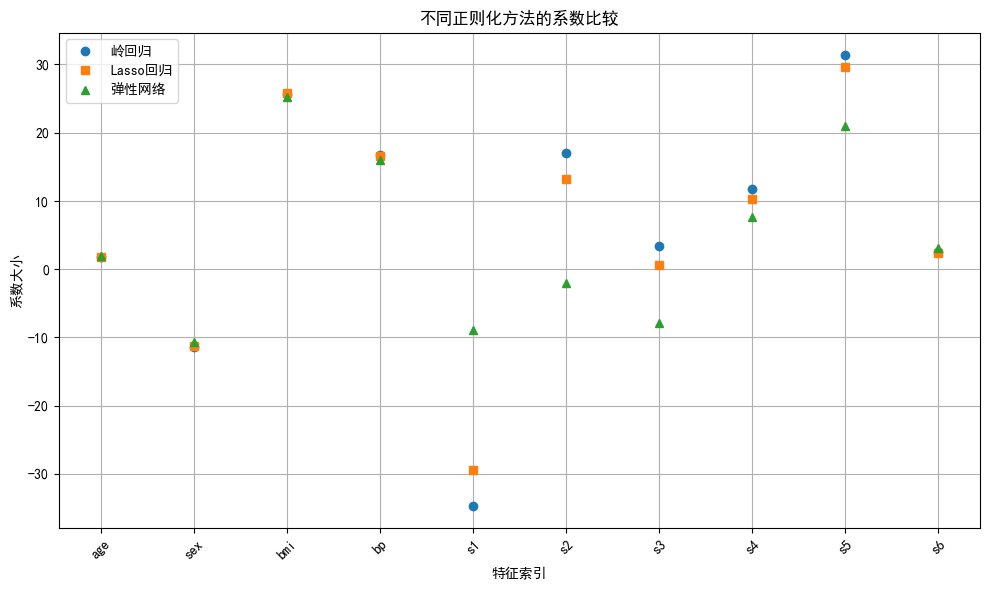

In [14]:
#可视化系数比较
#设置了图形的大小为宽10英寸，高6英寸。
plt.figure(figsize=(10, 6))
#数据集的特征
features = diabetes.feature_names

# 绘制系数大小
plt.plot(ridge.coef_, 'o', label="岭回归")
plt.plot(lasso.coef_, 's', label="Lasso回归")
plt.plot(elastic.coef_, '^', label="弹性网络")

#设置了x轴的刻度标签为特征名称，并且将这些标签旋转45度以避免重叠。
plt.xticks(range(len(features)), features, rotation=45)
#设置了x轴标签。
plt.xlabel("特征索引")
#设置了y轴的标签。
plt.ylabel("系数大小")
#设置了图形的标题
plt.title("不同正则化方法的系数比较")
#添加了图例，显示每种回归方法的标记和名称
plt.legend()
#设置了网格线
plt.grid(True)
#自动调整子图参数，使之填充整个图像区域。
plt.tight_layout()
plt.show()

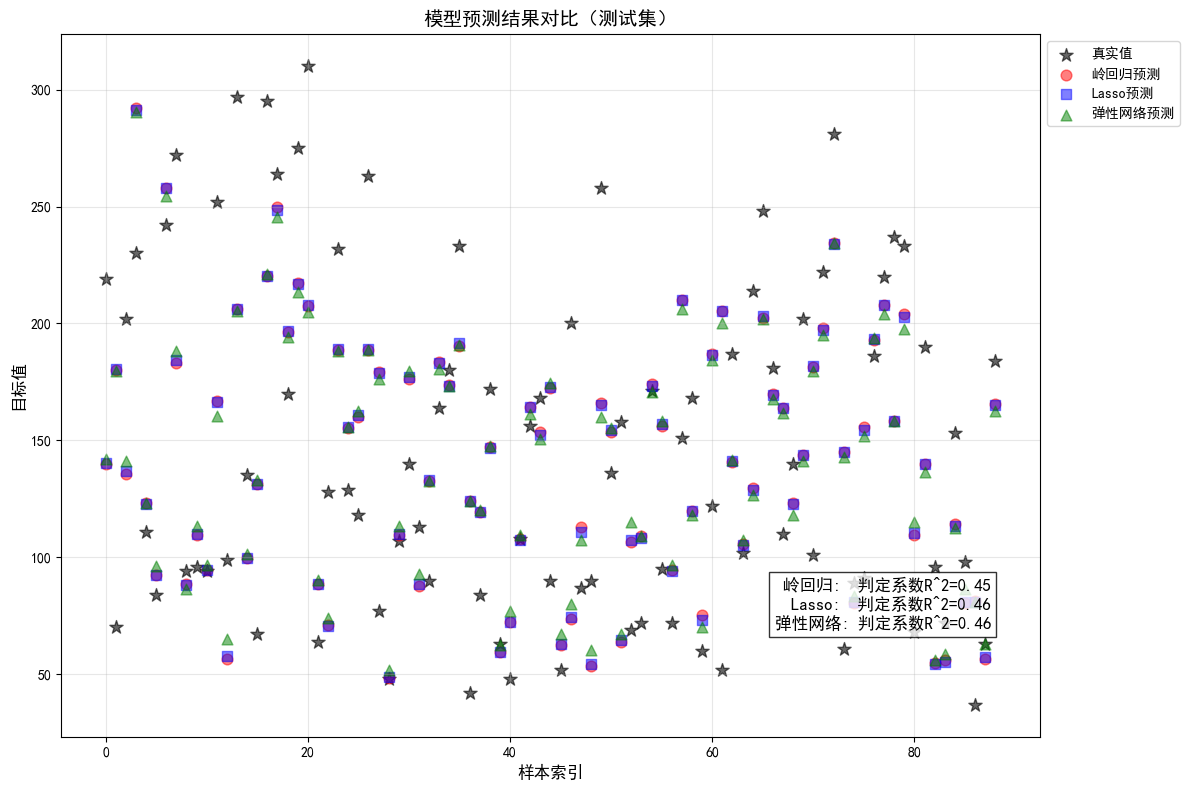

In [19]:
# 在原有代码基础上新增以下可视化部分

plt.figure(figsize=(12, 8))

# 生成样本索引（用于x轴）
sample_indices = np.arange(len(y_test))

# 绘制真实值
plt.scatter(sample_indices, y_test, color='black', alpha=0.6, marker='*', s=100, label='真实值')

# 绘制各模型预测值
plt.scatter(sample_indices,y_pred_ridge,color='red',alpha=0.5,marker='o',s=60,label='岭回归预测')
plt.scatter(sample_indices,y_pred_lasso,color='blue',alpha=0.5,marker='s',s=60,label='Lasso预测')
plt.scatter(sample_indices,y_pred_elastic,color='green',alpha=0.5,marker='^',s=60,label='弹性网络预测')

# 图表装饰
plt.title("模型预测结果对比（测试集）", fontsize=14)
plt.xlabel("样本索引", fontsize=12)
plt.ylabel("目标值", fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # 将图例移到图表外侧
plt.grid(True, alpha=0.3)
plt.tight_layout()

# 添加评估指标文本
text_str = '\n'.join([
    f'岭回归:  判定系数R^2={r2_score(y_test, y_pred_ridge):.2f}',
    f'Lasso:  判定系数R^2={r2_score(y_test, y_pred_lasso):.2f}',
    f'弹性网络: 判定系数R^2={r2_score(y_test, y_pred_elastic):.2f}'
])
plt.text(0.95, 0.15, text_str, transform=plt.gca().transAxes,
         ha='right', va='bottom', fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

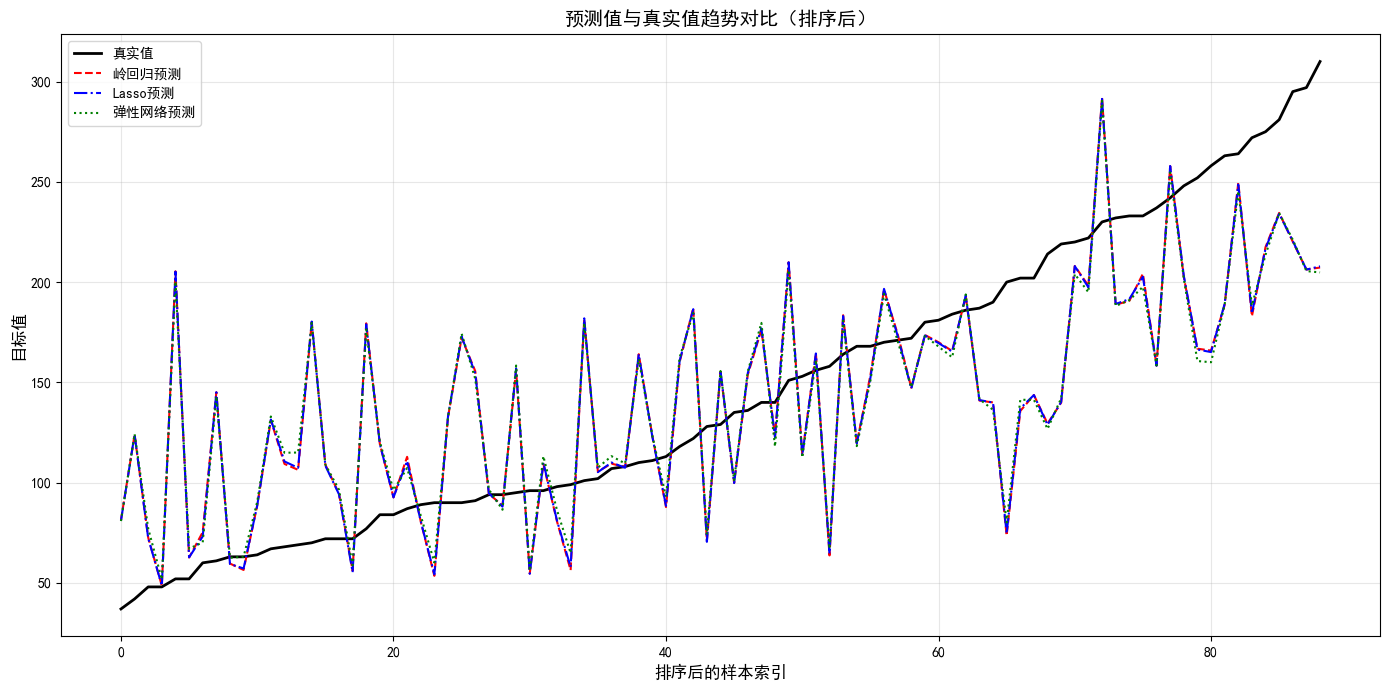

In [17]:
plt.figure(figsize=(14, 7))

# 按真实值排序（使曲线更易观察）
sorted_idx = np.argsort(y_test)
y_test_sorted = y_test[sorted_idx]
y_pred_ridge_sorted = y_pred_ridge[sorted_idx]
y_pred_lasso_sorted = y_pred_lasso[sorted_idx]
y_pred_elastic_sorted = y_pred_elastic[sorted_idx]

# 绘制曲线
plt.plot(y_test_sorted,   color='black', lw=2, label='真实值')
plt.plot(y_pred_ridge_sorted,  color='red',  linestyle='--', label='岭回归预测')
plt.plot(y_pred_lasso_sorted,  color='blue', linestyle='-.', label='Lasso预测')
plt.plot(y_pred_elastic_sorted,color='green',linestyle=':',  label='弹性网络预测')

# 图表装饰
plt.title("预测值与真实值趋势对比（排序后）", fontsize=14)
plt.xlabel("排序后的样本索引", fontsize=12)
plt.ylabel("目标值", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

当然，我觉得这个训练的效果一塌糊涂，哈哈

仅供使用正则化回归的代码模板的参考（狗头保命）